<a href="https://colab.research.google.com/github/melisdamla/Centralized-repository-shipping_calculations/blob/main/ProjetInfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Données** **utilisées**
Les données proviennent de sources publiques (OpenDataSoft & Data.Gouv) et contiennent des informations sur les loyers dans différentes agglomérations françaises. Les variables incluent : surface, type d'habitat, nombre de logements, nombre de pièces, etc.

# **🎯** **Objectif**
Prédire le loyer au mètre carré (loyer_m2) à partir de caractéristiques du logement et de son environnement.

# ⚙️ **Prétraitement**
Remplissage des valeurs manquantes :

Numérique : moyenne

Catégoriel : "Inconnu"

Normalisation des variables numériques avec StandardScaler

Encodage des variables catégorielles avec OneHotEncoder

Séparation Train/Test : 80% / 20%

# 🧠 **Modèles** **testés**
Modèle	RMSE	MAE	R²
Régression Linéaire	~0.075	~0.056	~0.831

Lasso	~0.075	~0.056	~0.829

Random Forest	0.0136	0.006	0.9945 ✅

Random Forest est le plus performant.

Hyperparamètres optimisés via GridSearchCV.

# **📊 Évaluation & Visualisation**
Graphique Réel vs Prédit (avec diagonale parfaite)

Zoom sur les erreurs > 0.1 pour les petites surfaces (< 30 m²)

Export des 10 plus grosses erreurs dans un fichier Excel (top_erreurs_random_forest.xlsx)

# **🧪 Analyse des variables**
Importance des variables mesurée via :

RandomForestRegressor .feature_importances_

Lasso .coef_

# **🔍 Suggestions d’amélioration**
Ajouter XGBoost, LightGBM pour affiner la comparaison

Créer un modèle spécifique pour les petites surfaces

Analyser l’importance des variables avec SHAP

Utiliser une validation croisée à 5 ou 10 folds

Ajouter une interface utilisateur simple pour test en ligne

In [12]:
import os
import requests
import pandas as pd

# ==============================
# 📁 Dossier et nom du fichier
# ==============================
DATA_DIR = "data"
RAW_FILE = os.path.join(DATA_DIR, "loyers_raw.csv")

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

# ==============================
# 📌 1. Données depuis OpenDataSoft (JSON)
# ==============================
ODS_API_URL = "https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/resultats-nationaux-des-observatoires-locaux-des-loyers-france/exports/json"

try:
    response = requests.get(ODS_API_URL)
    response.raise_for_status()
    df_ods = pd.DataFrame(response.json())
    print("✅ Données OpenDataSoft chargées avec succès.")
except requests.exceptions.RequestException as e:
    print(f"❌ Erreur OpenDataSoft : {e}")
    df_ods = pd.DataFrame()

# ==============================
# 📌 2. Données Data.gouv.fr (CSV 2014–2024)
# ==============================
DATA_GOUV_CSV_URLS = [
    "https://www.data.gouv.fr/fr/datasets/r/13d660de-6108-4df6-8a54-1828a991a186",
    "https://www.data.gouv.fr/fr/datasets/r/3da6ba68-1f1e-4c49-a7e8-f521bd099599",
    "https://www.data.gouv.fr/fr/datasets/r/2ae4fb01-c69d-4a4d-bd09-f02c1b02882e",
    "https://www.data.gouv.fr/fr/datasets/r/422b3274-114d-4abe-850c-dfc0c69b981f",
    "https://www.data.gouv.fr/fr/datasets/r/f0f3abb1-2aed-4301-a44a-b14b43d73e1a",
    "https://www.data.gouv.fr/fr/datasets/r/5dcdae40-91b5-44ba-8ffc-65af94b61c6a",
    "https://www.data.gouv.fr/fr/datasets/r/4f1363af-28d9-4ec2-bdad-88f8b51fd7f2",
    "https://www.data.gouv.fr/fr/datasets/r/e30cb3ba-e1ca-4bec-b6ea-3cb751d6b862",
    "https://www.data.gouv.fr/fr/datasets/r/1fee314d-c278-424f-a029-a74d877eb185",
    "https://www.data.gouv.fr/fr/datasets/r/15d902ed-4dc3-457d-9c5d-bfe1151cb573",
    "https://www.data.gouv.fr/fr/datasets/r/42aaf838-46c9-4434-95a9-00173c6d4627",
]

df_gouv_list = []
for url in DATA_GOUV_CSV_URLS:
    try:
        df = pd.read_csv(url, delimiter=";", encoding="ISO-8859-1", low_memory=False)
        df_gouv_list.append(df)
        print(f"✅ Données chargées : {url}")
    except Exception as e:
        print(f"❌ Erreur Data.gouv ({url}): {e}")

df_gouv = pd.concat(df_gouv_list, ignore_index=True) if df_gouv_list else pd.DataFrame()

# ==============================
# 📌 3. Fusion finale
# ==============================
df_loyers = pd.concat([df_ods, df_gouv], ignore_index=True)

# Nettoyage basique
df_loyers.columns = df_loyers.columns.str.strip()

# ==============================
# 📌 4. Sauvegarde finale
# ==============================
if not df_loyers.empty:
    df_loyers.to_csv(RAW_FILE, index=False, encoding="ISO-8859-1")
    print(f"\n✅ Données fusionnées sauvegardées sous '{RAW_FILE}'.")
    print("🔍 Aperçu des 5 premières lignes :")
    print(df_loyers.head())
else:
    print("❌ Aucun fichier de loyers valide généré.")


✅ Données OpenDataSoft chargées avec succès.
✅ Données chargées : https://www.data.gouv.fr/fr/datasets/r/13d660de-6108-4df6-8a54-1828a991a186
✅ Données chargées : https://www.data.gouv.fr/fr/datasets/r/3da6ba68-1f1e-4c49-a7e8-f521bd099599
✅ Données chargées : https://www.data.gouv.fr/fr/datasets/r/2ae4fb01-c69d-4a4d-bd09-f02c1b02882e
✅ Données chargées : https://www.data.gouv.fr/fr/datasets/r/422b3274-114d-4abe-850c-dfc0c69b981f
✅ Données chargées : https://www.data.gouv.fr/fr/datasets/r/f0f3abb1-2aed-4301-a44a-b14b43d73e1a
✅ Données chargées : https://www.data.gouv.fr/fr/datasets/r/5dcdae40-91b5-44ba-8ffc-65af94b61c6a
✅ Données chargées : https://www.data.gouv.fr/fr/datasets/r/4f1363af-28d9-4ec2-bdad-88f8b51fd7f2
✅ Données chargées : https://www.data.gouv.fr/fr/datasets/r/e30cb3ba-e1ca-4bec-b6ea-3cb751d6b862
✅ Données chargées : https://www.data.gouv.fr/fr/datasets/r/1fee314d-c278-424f-a029-a74d877eb185
✅ Données chargées : https://www.data.gouv.fr/fr/datasets/r/15d902ed-4dc3-457d-9c5

In [9]:
import os
import pandas as pd

# ==============================
# 📌 Définition des fichiers
# ==============================
DATA_DIR = "data"
RAW_FILE = os.path.join(DATA_DIR, "loyers_raw.csv")
CLEAN_FILE = os.path.join(DATA_DIR, "loyers_clean.csv")

# ==============================
# 📌 Chargement des données brutes
# ==============================
if not os.path.exists(RAW_FILE):
    print(f"❌ Fichier introuvable : {RAW_FILE}")
    exit()

df = pd.read_csv(RAW_FILE, delimiter=",", encoding="ISO-8859-1", low_memory=False)
print("✅ Données brutes chargées avec succès.")
print(f"🔍 Dimensions initiales : {df.shape}")

# ==============================
# 📌 Renommage des colonnes utiles
# ==============================
column_mapping = {
    "loyer_median": "loyer",
    "surface_moyenne": "surface",
    "nombre_pieces_homogene": "nombre_pieces"
}
df = df.rename(columns=column_mapping)

# ==============================
# 📌 Extraction de la variable nombre_pieces
# ==============================
def extraire_nombre_pieces(val):
    if isinstance(val, str):
        for part in val.split():
            try:
                return float(part.replace('P', ''))
            except:
                continue
    try:
        return float(val)
    except:
        return None

df["nombre_pieces"] = df["nombre_pieces"].apply(extraire_nombre_pieces)

# ==============================
# 📌 Vérification des colonnes essentielles
# ==============================
required_columns = ["loyer", "surface", "nombre_pieces"]
for col in required_columns:
    if col not in df.columns:
        print(f"❌ Colonne manquante : {col}")
        exit()

# ==============================
# 📌 Nettoyage des valeurs manquantes
# ==============================
df = df.dropna(subset=required_columns)
print(f"✅ Après suppression des NaN : {df.shape}")

# ==============================
# 📌 Conversion numérique
# ==============================
for col in required_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna(subset=required_columns)
print(f"✅ Après conversion numérique : {df.shape}")

# ==============================
# 📌 Suppression des valeurs aberrantes
# ==============================
df = df[(df["loyer"] > 5) & (df["loyer"] < 10000)]
df = df[(df["surface"] > 5) & (df["surface"] < 500)]
print(f"✅ Après suppression des outliers : {df.shape}")

# ==============================
# 📌 Ajout du loyer au m²
# ==============================
df["loyer_m2"] = df["loyer"] / df["surface"]

# ==============================
# 📌 Sauvegarde
# ==============================
if len(df) == 0:
    print("❌ Plus aucune donnée après nettoyage. Vérifie les filtres.")
else:
    df.to_csv(CLEAN_FILE, index=False, encoding="ISO-8859-1")
    print(f"✅ Données nettoyées sauvegardées dans '{CLEAN_FILE}' ({len(df)} lignes).")


✅ Données brutes chargées avec succès.
🔍 Dimensions initiales : (133058, 29)
✅ Après suppression des NaN : (46779, 29)
✅ Après conversion numérique : (13336, 29)
✅ Après suppression des outliers : (13330, 29)

📋 Colonnes finales du fichier nettoyé :
['observatory', 'data_year', 'agglomeration', 'zone_complementaire', 'type_habitat', 'epoque_construction_homogene', 'anciennete_locataire_homogene', 'nombre_pieces', 'loyer_1_decile', 'loyer_1_quartile', 'loyer', 'loyer_3_quartile', 'loyer_9_decile', 'loyer_moyen', 'loyer_mensuel_1_decile', 'loyer_mensuel_1_quartile', 'loyer_mensuel_median', 'loyer_mensuel_3_quartile', 'loyer_mensuel_9_decile', 'moyenne_loyer_mensuel', 'surface', 'nombre_observations', 'nombre_logements', 'methodologie_production', 'Observatory', 'Data_year', 'Zone_complementaire', 'Type_habitat', 'nombre_obsservations', 'loyer_m2']

🔍 Aperçu des premières lignes :
   observatory  data_year                 agglomeration zone_complementaire  \
0        B1300     2018.0     

✅ Données chargées : (13330, 30)

📊 Statistiques descriptives de 'loyer_m2' :
count    13330.000000
mean         0.284514
std          0.185197
min          0.054167
25%          0.147059
50%          0.227957
75%          0.403571
max          1.304348
Name: loyer_m2, dtype: float64


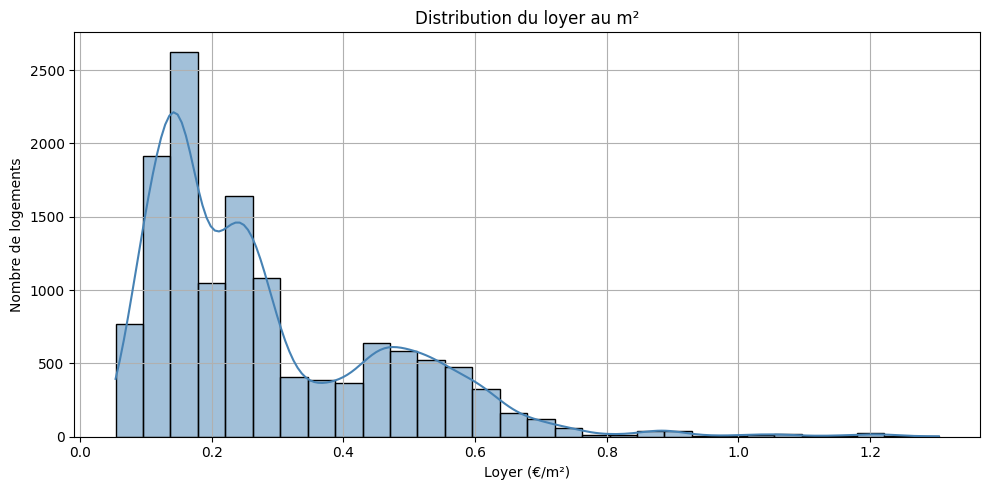

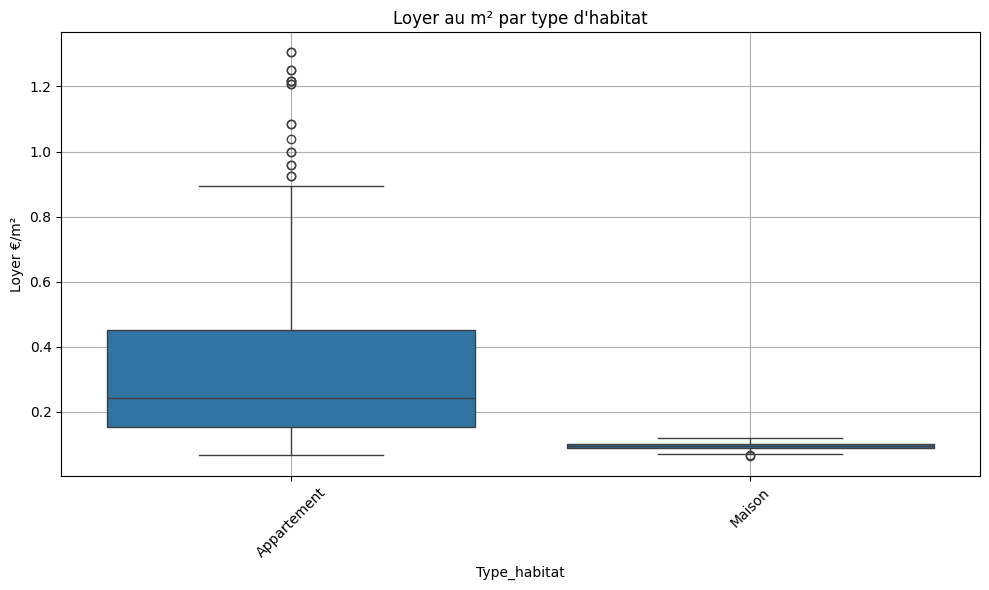

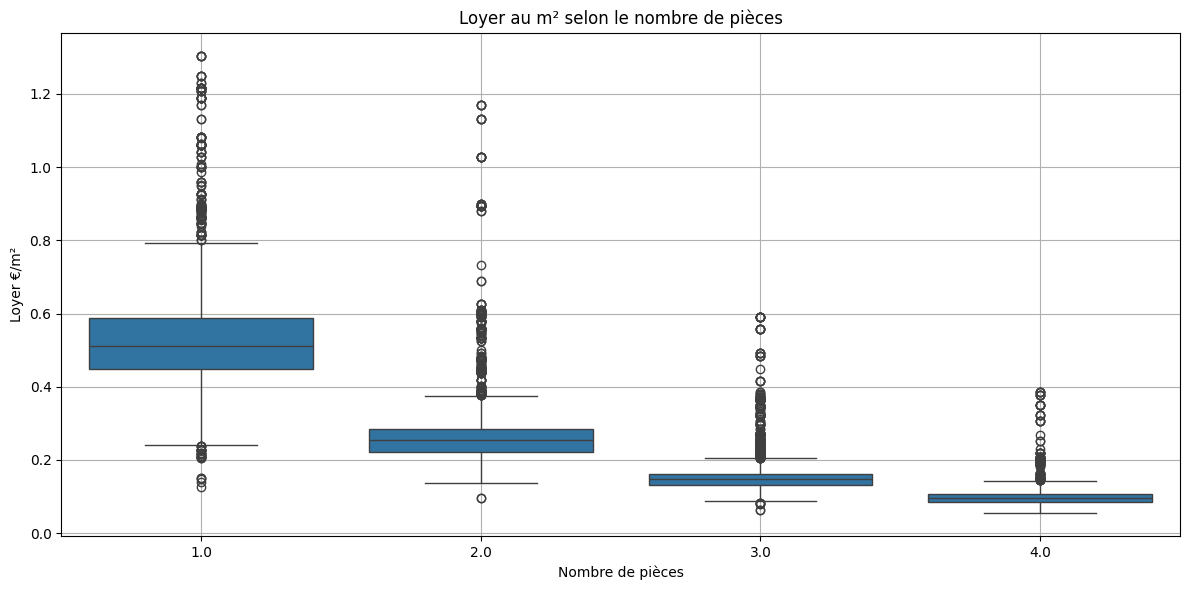

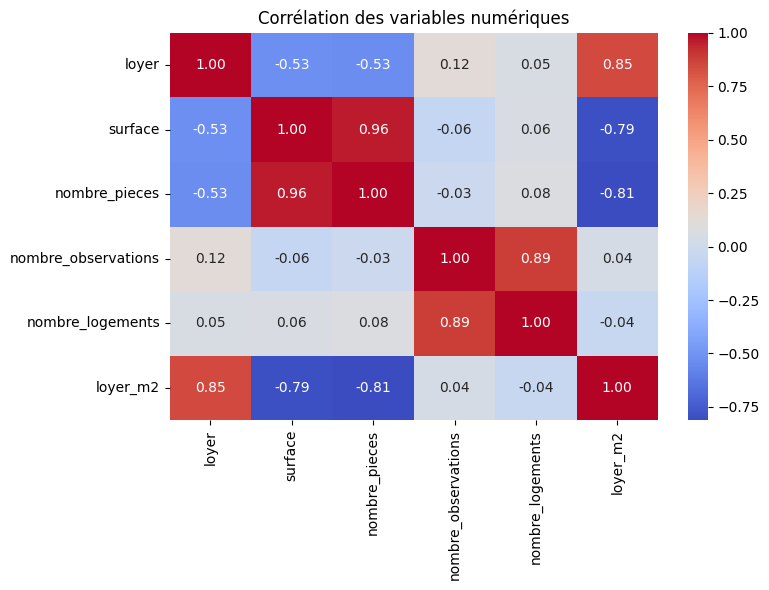

<ipython-input-10-e1c0cca21438>:127: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

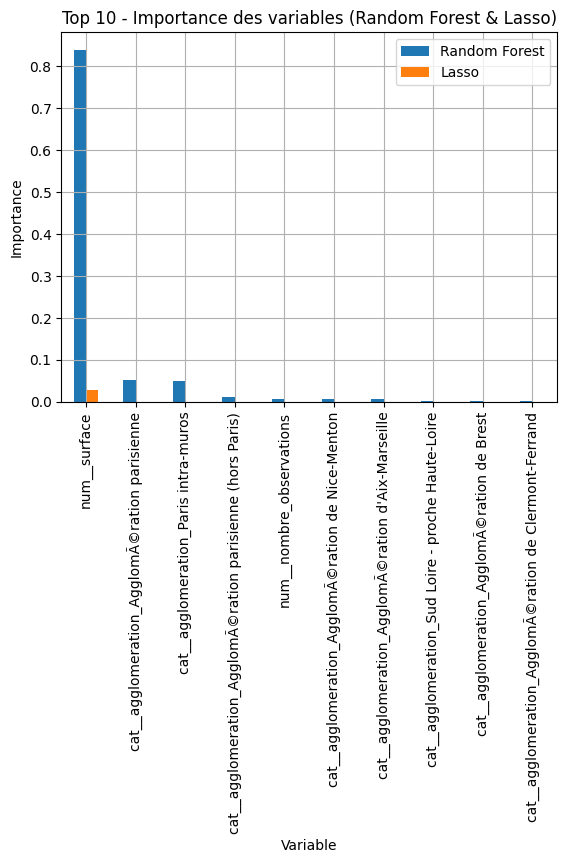

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# ==============================
# 📌 Chargement des données nettoyées
# ==============================
DATA_DIR = "data"
CLEAN_FILE = os.path.join(DATA_DIR, "loyers_clean.csv")

df = pd.read_csv(CLEAN_FILE, encoding="ISO-8859-1")
print("✅ Données chargées :", df.shape)

# 🔧 Nettoyage des noms de colonnes
df.columns = df.columns.str.strip()

# ==============================
# 📊 Statistiques descriptives
# ==============================
print("\n📊 Statistiques descriptives de 'loyer_m2' :")
print(df["loyer_m2"].describe())

# ==============================
# 📊 Histogramme du loyer au m²
# ==============================
plt.figure(figsize=(10, 5))
sns.histplot(df["loyer_m2"], kde=True, bins=30, color="steelblue", edgecolor="black")
plt.title("Distribution du loyer au m²")
plt.xlabel("Loyer (€/m²)")
plt.ylabel("Nombre de logements")
plt.grid(True)
plt.tight_layout()
plt.show()

# ==============================
# 📊 Boxplots par variables catégorielles
# ==============================
plt.figure(figsize=(10, 6))
sns.boxplot(x="Type_habitat", y="loyer_m2", data=df)
plt.title("Loyer au m² par type d'habitat")
plt.ylabel("Loyer €/m²")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="nombre_pieces", y="loyer_m2", data=df)
plt.title("Loyer au m² selon le nombre de pièces")
plt.xlabel("Nombre de pièces")
plt.ylabel("Loyer €/m²")
plt.grid(True)
plt.tight_layout()
plt.show()

# ==============================
# 📊 Corrélation des variables numériques
# ==============================
numeric_cols = ["loyer", "surface", "nombre_pieces", "nombre_observations", "nombre_logements", "loyer_m2"]
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation des variables numériques")
plt.tight_layout()
plt.show()

# ==============================
# 📈 Importance des variables
# ==============================
numerical_cols = ["surface", "nombre_pieces", "nombre_observations", "nombre_logements"]
categorical_cols = ["agglomeration", "Zone_complementaire", "Type_habitat", "epoque_construction_homogene"]

# Préparation du pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, numerical_cols),
    ("cat", cat_pipeline, categorical_cols)
])

# Séparation des données
X = df[numerical_cols + categorical_cols]
y = df["loyer_m2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_transformed = preprocessor.fit_transform(X_train)
feature_names = preprocessor.get_feature_names_out()

# Modèles
rf = RandomForestRegressor(n_estimators=100, random_state=42)
lasso = Lasso(alpha=0.01)

rf.fit(X_train_transformed, y_train)
lasso.fit(X_train_transformed, y_train)

# Importances
importance_df = pd.DataFrame({
    "Variable": feature_names,
    "Random Forest": rf.feature_importances_,
    "Lasso": np.abs(lasso.coef_)
}).sort_values(by="Random Forest", ascending=False).head(10)

# 📊 Affichage
plt.figure(figsize=(12, 6))
importance_df.set_index("Variable").plot(kind="bar")
plt.title("Top 10 - Importance des variables (Random Forest & Lasso)")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
# loyers_modelisation.py

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Chargement des données
DATA_FILE = "data/loyers_clean.csv"
df = pd.read_csv(DATA_FILE, encoding="ISO-8859-1")
print("✅ Données chargées :", df.shape)

# 2. Variables
target = "loyer_m2"
features = [
    "surface", "nombre_pieces", "nombre_observations", "nombre_logements",
    "agglomeration", "Zone_complementaire", "Type_habitat", "epoque_construction_homogene"
]
X = df[features].copy()
y = df[target]

# 3. Imputation des valeurs manquantes
for col in X.select_dtypes(include=["number"]).columns:
    X[col] = X[col].fillna(X[col].mean())
for col in X.select_dtypes(include=["object"]).columns:
    X[col] = X[col].fillna("Inconnu")

# 4. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_original = X_test.copy()

# 5. Prétraitement
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

# 6. Pipeline & GridSearch
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

param_grid = {
    "model__n_estimators": [200],
    "model__max_depth": [None]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 7. Évaluation
y_pred = grid_search.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"🎯 RMSE : {rmse:.4f} | R² : {r2:.4f}")

# 8. Analyse des erreurs
errors_df = pd.DataFrame({
    "Valeur réelle": y_test.values,
    "Valeur prédite": y_pred,
    "Erreur absolue": np.abs(y_test.values - y_pred)
}, index=y_test.index)

final_df = pd.concat([X_test_original.reset_index(drop=True), errors_df.reset_index(drop=True)], axis=1)
final_df = final_df.sort_values(by="Erreur absolue", ascending=False)

# 9. Export du top 10
top10 = final_df.head(10)
top10.to_excel("top_erreurs_random_forest.xlsx", index=False)
print("📁 Fichier 'top_erreurs_random_forest.xlsx' exporté avec succès.")

# 10. Graphique global Prédiction vs Réel
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='cornflowerblue', label="Prédictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Parfait (y = x)")
plt.xlabel("Valeurs réelles du loyer au m²")
plt.ylabel("Valeurs prédites")
plt.title("Prédiction vs Réel - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/pred_vs_reel.png")
plt.show()

# 11. Zoom sur les outliers
outliers = final_df[(final_df["Erreur absolue"] > 0.1) & (final_df["surface"] < 30)]

plt.figure(figsize=(8, 6))
plt.scatter(outliers["Valeur réelle"], outliers["Valeur prédite"], color='orange', label="Outliers")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Valeur réelle")
plt.ylabel("Valeur prédite")
plt.title("Zoom sur les erreurs avec surface < 30 m²")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/zoom_outliers.png")
plt.show()

print(f"📌 Nombre d'outliers détectés : {len(outliers)}")


✅ Données chargées : (13330, 30)
